# Training and evaluating Singing Voice Detectors

In [1]:
import sys
sys.path.append('../vocaldetection/')
import sklearn
import utils
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns
#import librosa
import numpy as np
from scipy.io import arff
import matplotlib.pyplot as plt
#import medleydb as mdb
%matplotlib inline
import joblib
import scipy.signal

dirname = os.path.dirname('')

I know that the best parameters for training SVM and RF on this dataset are C=0.1 for SVM and nE=100 for RF. [WHY??]

Then, I can just train the models with these parameters and see how the results on confusion changes.

For each set of descriptors, I can do a cross validation evaluation and see the accuracy for each classifier.

Then, I select the greater accuracy to be my reference of ceiling confusion.

In [133]:
import medleydb as mdb

# Store all multitracks
all_mtracks = {}

# Load all multitracks
mtrack_generator = mdb.load_all_multitracks()
for mtrack in mtrack_generator:
    all_mtracks[mtrack.track_id] = mtrack
    

In [2]:
features = ['VGGish']

In [3]:
labels = ['absent','present']

In [4]:
# Path for features calculated with Lehner Code
all_feat_path = '/media/DISCO2TB/datasets/MedleyDB/Features/ICASSP2014/'
f = all_feat_path+'ICASSP2014RNN/'
mfcc_path = all_feat_path+'MFCC_29_30_0_0.5_0dt/40_20_40/'

# # Read features and labels
# FEAT_PATH = os.environ["FEAT_PATH"]
# AUDIO_PATH = os.environ["AUDIO_PATH"]
# PIECES = 'split_train_test.json'#os.environ["PIECES_JSON"]
# PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')

# Read features and labels
FEAT_PATH = '/media/DISCO2TB/datasets/MedleyDB/Features/'#os.environ["FEAT_PATH"]
SOURCE_PATH = '/media/DISCO2TB/datasets/MedleyDB/Annotations/Instrument_Activations/SOURCEID/'
AUDIO_PATH = os.environ["AUDIO_PATH"]
PIECES = os.environ["PIECES_JSON"]
PIECES_SPLIT =  os.path.join(dirname, 'split_train_test.json')
SPLITS = 'split_train_test_10.json'

## Recover 10 splits dataset into train and test sets

In [5]:
train_files = []
test_files = []
with open(SPLITS) as json_file:  
    data = json.load(json_file)
#print (data)
    for spl in range(len(data)):
        train_files.append([])
        test_files.append([])
        # Load train data
        for music in data[spl]['train']:
            train_files[spl].append(music)
        #    print (music)

        # Load test data
        #print ('Test data')
        for music in data[spl]['test']:
            test_files[spl].append(music)


## Evaluate on Train Data

In [ ]:
# Now lets predict the labels of the train data!
predictions = rf.predict(X)

In [7]:
rf = joblib.load('../best_model_RF_VGGISH_precision.sav')

In [13]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y, ones)
print(accuracy)

0.6988659376265695


In [14]:
# RF Accuracy
accuracy = sklearn.metrics.accuracy_score(y, predictions)
print(accuracy)

1.0


In [15]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y, predictions)
print('Negatives : ', metrics[3][0],'- Positives',metrics[3][1])
print('Precision :', round(metrics[0][1],3))
print('Recall    :', round(metrics[1][1],3))
print('F-score   :', round(metrics[2][1],3))

Negatives :  5948 - Positives 13804
Precision : 1.0
Recall    : 1.0
F-score   : 1.0


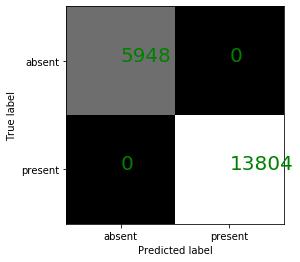

In [18]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y, predictions)
plot_cm(cm)

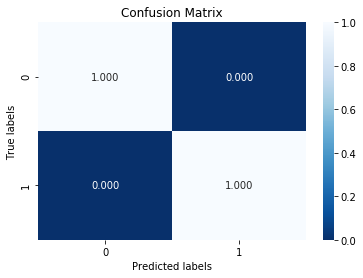

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1, cmap="Blues_r"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
#cbar = ax.figure.colorbar(ax.collections[0])
#cbar.set_ticks([0, 1])
#ax.set_ticklabels(["0%", "100%"])

## Evaluate on Test Data

In [20]:
# Now lets predict the labels of the train data!
predictions = rf.predict(X_test)

In [21]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y_test, ones)
print(accuracy)

0.7238282346337356


In [22]:
# RF Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.8349705304518664


In [23]:
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test, predictions)
print('Negatives : ', metrics[3][0],'- Positives',metrics[3][1])
print('Precision :', round(metrics[0][1],3))
print('Recall    :', round(metrics[1][1],3))
print('F-score   :', round(metrics[2][1],3))

Negatives :  984 - Positives 2579
Precision : 0.882
Recall    : 0.892
F-score   : 0.887


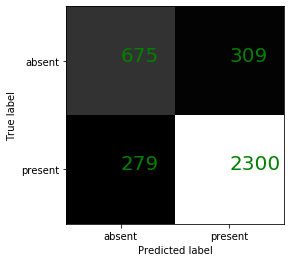

In [24]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
plot_cm(cm)

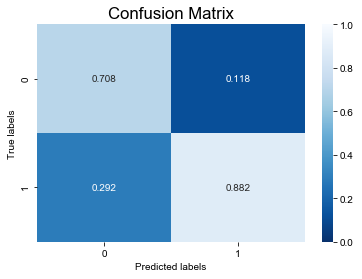

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1,  cmap="Blues_r"); #annot=True to annotate cells

sns.set(font_scale=1.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
# cbar = cd.figure.colorbar(cd.collections[0])
# cbar.set_ticks([0, 1])
# cbar.set_ticklabels(["0%", "100%"])

In [31]:
cm[1][1]/sum(cm[:,1])

0.7401484402180216

## Evaluate all pieces from test

In [6]:
df_cm = pd.DataFrame()
df_acc = pd.DataFrame()

In [ ]:
for piece_name in test_files:
    piece_features, piece_labels = sf.read_vggish_features([piece_name])
    #print (piece_test.shape, piece_features.shape)
    pred_labels = rf.predict(piece_features)
    acc = accuracy = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
    cm = sklearn.metrics.confusion_matrix(piece_labels, pred_labels)
    df_cm = df_cm.append({'piece': piece_name,
                          'TP':cm[1][1]/sum(cm[:,1]),
                          'TN':cm[0][0]/sum(cm[:,0]),
                         'error score':'precision'}, ignore_index=True)
    df_acc = df_acc.append({'piece': piece_name,
                            'ACC': acc,
                           'error score':'precision'}, ignore_index=True)

In [8]:
df_acc = df_acc.fillna('f1')


Text(0.5, 0, 'Acurácia')

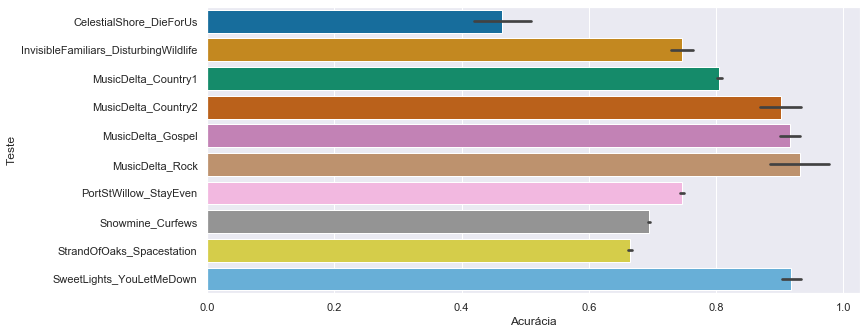

In [92]:
sns.set_palette("colorblind")
sns.barplot(data=df_acc, y='piece',x='ACC')
plt.ylabel("Teste")
plt.xlabel("Acurácia")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 22.960000000000008, 'Porcentagem')

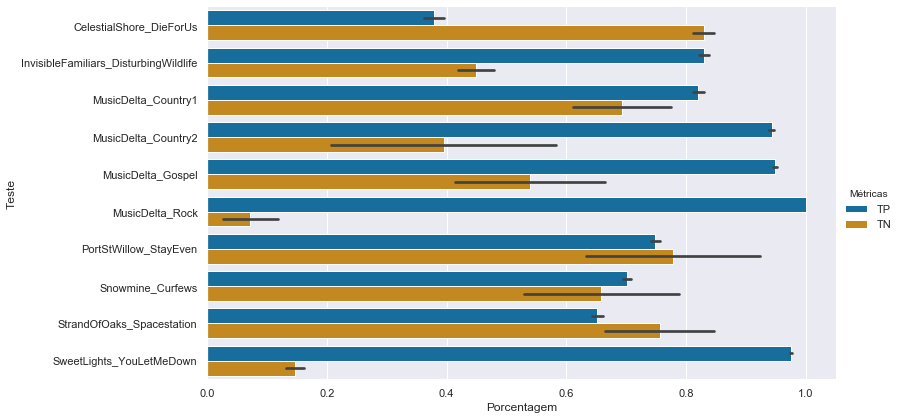

In [93]:
# Show all metrics on one graph
df_cm2 = pd.melt(df_cm, id_vars="piece", var_name="metric", value_name="correct rate", value_vars=['TP', 'TN'])
sns.factorplot(y='piece', x='correct rate', hue='metric', data=df_cm2, kind='bar', size=6, aspect=2)._legend.set_title('Métricas')
plt.ylabel("Teste")
plt.xlabel("Porcentagem")

## Calculate better hiperparameters for VGGish

In [ ]:
import separated_features_training as sf
rows_list = []

for spl in range(10):
    
    X_train, y_train = sf.read_vggish_features(train_files[spl])
    grid_search = sf.rf_param_selection(X_train, y_train, 5)
    break
#     print ('test')
#     X_t, y_t = sf.read_vggish_features(test_files[spl])

In [18]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [6]:
def even_median_filter(vec, kernel=4):
    i = int(kernel/2)
    result = []
    vec = np.concatenate([[0]*int(kernel/2),vec])
    while i < len(vec):
        x = vec[i:i+kernel]
        result.append(np.median(x))
        i+=1
        
    return np.array(result)

In [7]:
def optimal_threshold(predicted,target):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])[0]


## Evaluate pieces from all splits


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support

import separated_features_training as sf
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import roc_curve, precision_recall_curve, auc, f1_score, accuracy_score


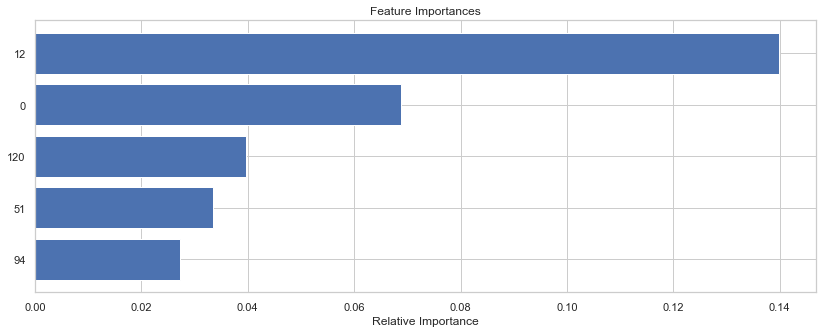

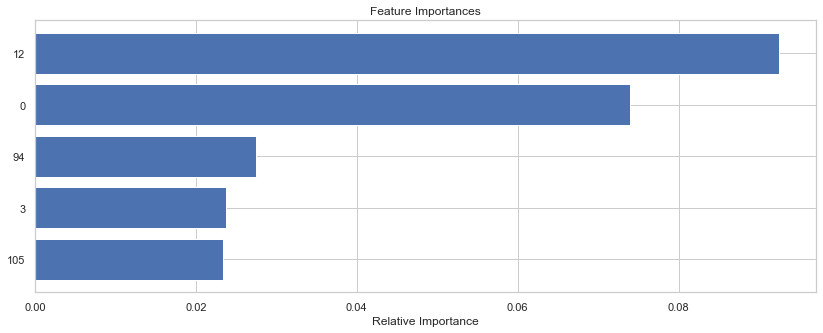

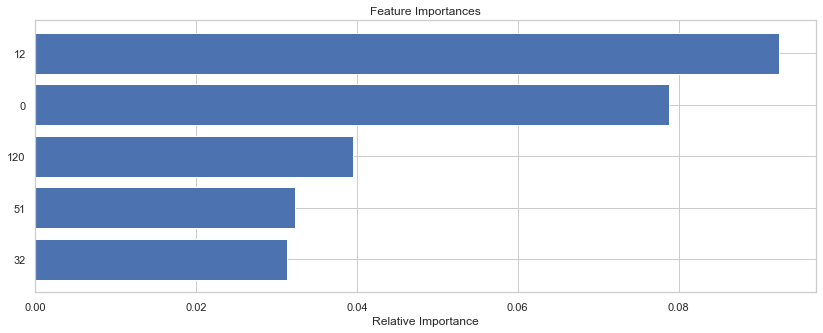

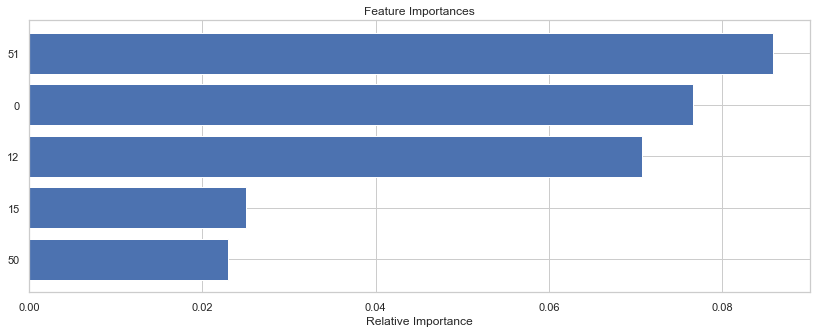

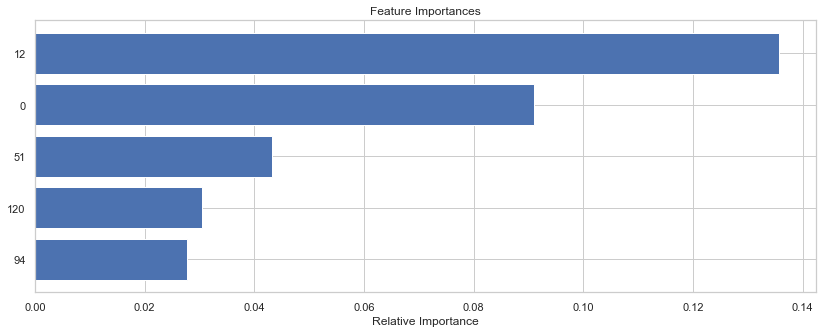

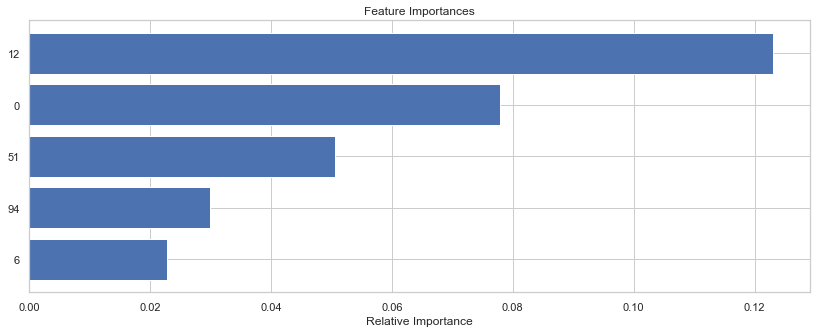

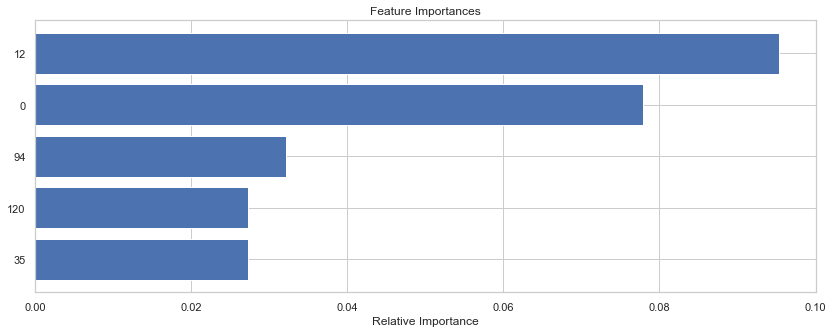

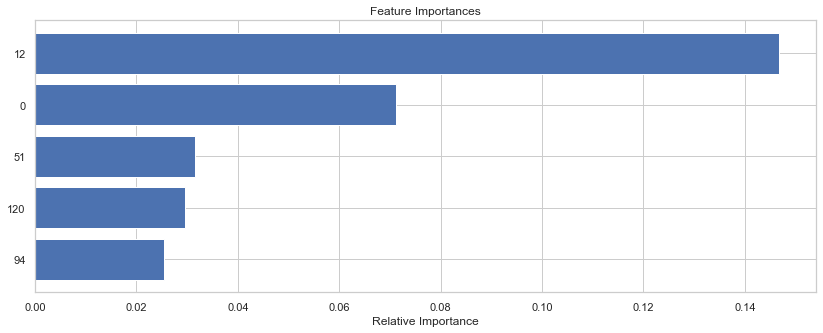

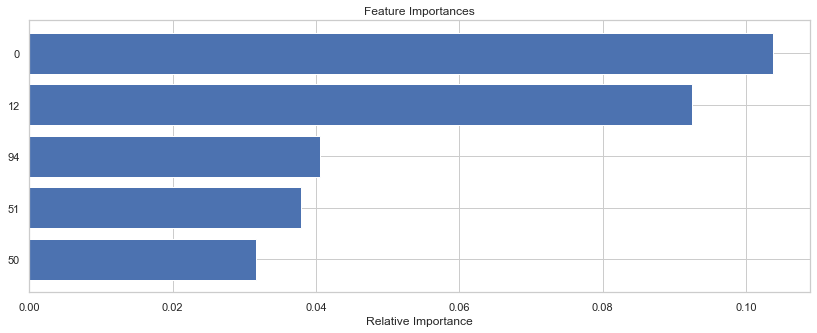

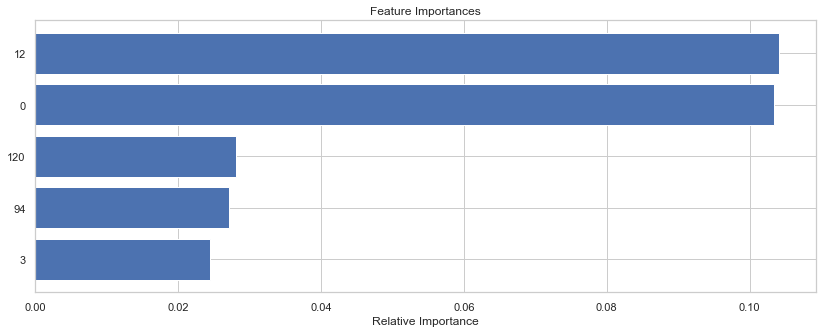

In [145]:
rows_list = []
rf_models = []
saco = []

for spl in range(10):
    
    np.random.seed(8536235)
    clf3=RandomForestClassifier(bootstrap=True, 
                                max_depth=30,
                                max_features='sqrt',
                                n_estimators=10)
    
    X_train, y_train = sf.read_vggish_features(train_files[spl], verbose=False)
    X_test, y_test = sf.read_vggish_features(test_files[spl], verbose=False)
    
    clf3.fit(X_train, y_train)
    rf_models.append(clf3)
    
    X_train_probabilities = clf3.predict_proba(X_train)[:,1]
    # Find optimal threshold from train set
    opt_tshld = optimal_threshold(X_train_probabilities, y_train)
    
    for piece_name in tqdm(test_files[spl]):
        piece_features, piece_labels = sf.read_vggish_features([piece_name], verbose=False)
        piece_genre = all_mtracks[piece_name].genre
            
        proba = clf3.predict_proba(piece_features)
        proba = proba[:,1]

        #
        pred_labels = clf3.predict(piece_features)
        acc = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, pred_labels, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'genre':piece_genre,
                          'type':'output',
                          'opt_tshld':opt_tshld,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        #
#         pred_filt = even_median_filter(pred_labels,kernel=2)
#         acc = sklearn.metrics.accuracy_score(piece_labels, pred_filt)
#         P,R,F1,_ = precision_recall_fscore_support(piece_labels, pred_filt, average='binary')
#         rows_list.append({'split':spl,
#                           'piece':piece_name,
#                           'type':'smooth output',
#                           'opt_tshld':opt_tshld,
#                           'ACC':acc,
#                           'P':P,'R':R,'F1':F1})
        
                #
        #thresh = even_median_filter(proba,kernel=2)
        #thresh = scipy.signal.medfilt(proba,kernel_size=5)
        thresh = np.where(even_median_filter(proba,kernel=2) >= 0.5,1,0)
        acc = sklearn.metrics.accuracy_score(piece_labels, thresh)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, thresh, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'genre':piece_genre,
                          'type':'fixed threshold',
                          'opt_tshld':opt_tshld,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})
        
        #thresh = even_median_filter(proba,kernel=2)
        #thresh = scipy.signal.medfilt(proba,kernel_size=5)
        thresh = np.where(scipy.signal.medfilt(proba,kernel_size=7) >= 0.5,1,0)
        acc = sklearn.metrics.accuracy_score(piece_labels, thresh)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, thresh, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'genre':piece_genre,
                          'type':'fixed threshold smoothed',
                          'opt_tshld':opt_tshld,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        #
        #thresh = even_median_filter(proba,kernel=2)
        #thresh = scipy.signal.medfilt(proba,kernel_size=5)
        thresh = np.where(even_median_filter(proba,kernel=2) >= opt_tshld,1,0)
        acc = sklearn.metrics.accuracy_score(piece_labels, thresh)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, thresh, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'genre':piece_genre,
                          'type':'optimal binarization',
                          'opt_tshld':opt_tshld,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        #
        #thresh = even_median_filter(proba,kernel=2)
        #thresh = scipy.signal.medfilt(proba,kernel_size=5)
        thresh = np.where(scipy.signal.medfilt(proba,kernel_size=7) >= opt_tshld,1,0)
        acc = sklearn.metrics.accuracy_score(piece_labels, thresh)
        P,R,F1,_ = precision_recall_fscore_support(piece_labels, thresh, average='binary')
        rows_list.append({'split':spl,
                          'piece':piece_name,
                          'genre':piece_genre,
                          'type':'optimal binarization smoothed',
                          'opt_tshld':opt_tshld,
                          'ACC':acc,
                          'P':P,'R':R,'F1':F1})

        # Plot all together
#         sns.set_style(style='white')
#         plt.figure(figsize=(14,3))
#         plt.plot(piece_labels+2)
#         plt.plot(pred_labels+1)
#         plt.plot(pred_filt)
#         plt.plot(proba-1)
#         plt.plot(scipy.signal.medfilt(proba,kernel_size=5)-2)
#         plt.plot(thresh-3)
#         plt.legend(['Original Label', 'Predicted Label', 'Filter Prediction', 
#                     'Probabilities', 'Filter Probabilities', 'Threshold Prob'], bbox_to_anchor=(1, 1))

    plt.figure(figsize=(14,5))
    features = np.arange(128)
    importances = clf3.feature_importances_
    indices = np.argsort(importances)

    plt.figure(1)
    plt.title('Feature Importances')
    plt.barh(range(len(indices))[123:], importances[indices][123:], color='b', align='center')
    plt.yticks(range(len(indices))[123:], features[indices][123:])
    saco += [str(x) for x in features[indices][123:]]
    plt.xlabel('Relative Importance')
    plt.show()

In [85]:
# See sources inside intervals

In [86]:
sf.which_sources('AvaLuna_Waterduct',0,30)

{'distorted electric guitar', 'drum set', 'electric bass', 'synthesizer'}

In [146]:
results_rf = pd.DataFrame(rows_list)

In [11]:
results_rf = results_rf.sort_values('ACC')

In [ ]:
plt.figure(figsize=(8,20))
sns.barplot(y='piece', x='ACC', hue='type', data=results_rf)

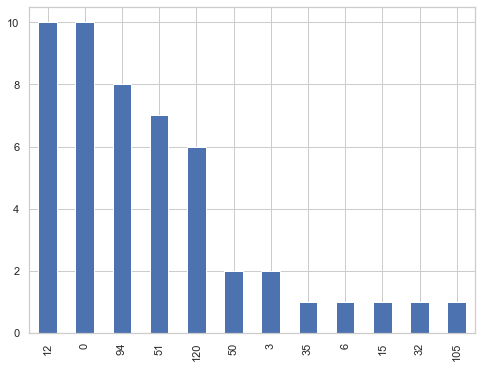

In [149]:
from collections import Counter
plt.figure(figsize=(8,6))

pd.Series(Counter(saco)).sort_values(ascending=False).plot(kind='bar')

In [114]:
results_resumed = results_rf[['ACC','P','R','F1','split','type']].groupby(['type']).mean()

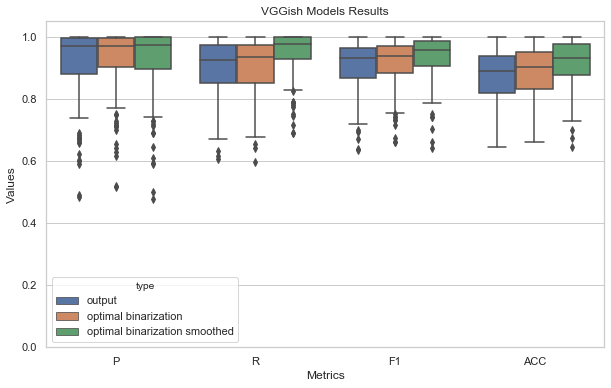

In [150]:
df_melt = pd.melt(results_rf, id_vars=['type'], value_vars=['ACC','P','R','F1'],var_name='metric', value_name='value')

df_melt = df_melt.sort_values('type',ascending=True)
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.title('VGGish Models Results')
g = sns.boxplot(data=df_melt,hue='type',x='metric',y='value',
                hue_order=['output',    'optimal binarization', 'optimal binarization smoothed'],
                order=['P','R','F1','ACC'])
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
#plt.legend(title='Type')
plt.show()

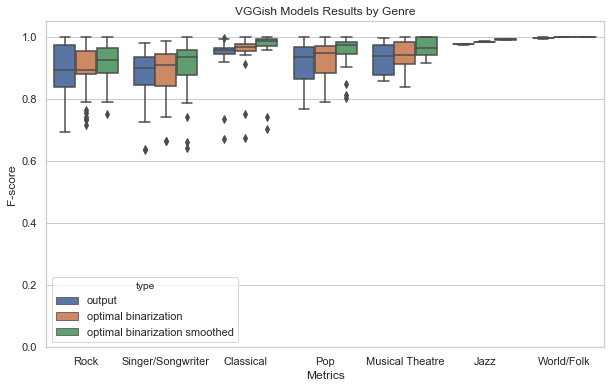

In [152]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.title('VGGish Models Results by Genre')
g = sns.boxplot(data=results_rf,hue='type',x='genre',y='F1',
                hue_order=['output',    'optimal binarization', 'optimal binarization smoothed'],
                #order=['P','R','F1','ACC']
               )
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='F-score')
#plt.legend(title='Type')
plt.show()

In [100]:
sns.set_style('whitegrid')

In [131]:
import medleydb as mdb

# Store all multitracks
all_mtracks = []

# Load all multitracks
mtrack_generator = mdb.load_all_multitracks()
for mtrack in mtrack_generator:
    all_mtracks.append(mtrack)
    

In [138]:
results_rf.head()

split              piece genre                           type  opt_tshld  \
0      0  AvaLuna_Waterduct  Rock                         output        0.6   
1      0  AvaLuna_Waterduct  Rock                fixed threshold        0.6   
2      0  AvaLuna_Waterduct  Rock       fixed threshold smoothed        0.6   
3      0  AvaLuna_Waterduct  Rock           optimal binarization        0.6   
4      0  AvaLuna_Waterduct  Rock  optimal binarization smoothed        0.6   

        ACC         P         R        F1  
0  0.857831  0.784553  0.969849  0.867416  
1  0.792771  0.698246  1.000000  0.822314  
2  0.732530  0.645695  0.979899  0.778443  
3  0.865060  0.806867  0.944724  0.870370  
4  0.845783  0.773279  0.959799  0.856502

In [94]:
results_rf.opt_tshld.unique()

array([0.50833333, 0.6       ])

In [12]:
results_rf = results_rf.sort_values(by='ACC')

In [13]:
results_rf_mean = results_rf.groupby(['piece']).mean().reset_index()

In [17]:
results_rf_mean = results_rf_mean.sort_values(by='ACC')

[(0.0, 1.0)]

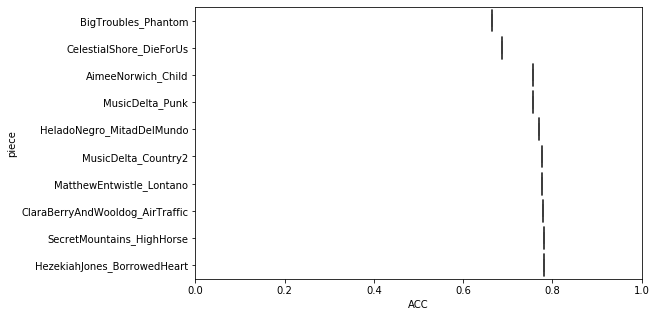

In [18]:
plt.figure(figsize=(8,5))
g= sns.boxplot(y='piece', x='ACC',  data=results_rf_mean.head(10))
g.set(xlim=(0.0,1.0))

In [26]:
pieces_chosen = ['CelestialShore_DieForUs', 
                 'BigTroubles_Phantom', 
                 'PurlingHiss_Lolita',
                 'AlexanderRoss_GoodbyeBolero',
                 'Auctioneer_OurFutureFaces']

df_melt = pd.melt(results_rf[results_rf['piece'].isin(pieces_chosen)], 
                  id_vars=['type','piece'], 
                  value_vars=['ACC','P','R','F1'],
                  var_name='metric', value_name='value')

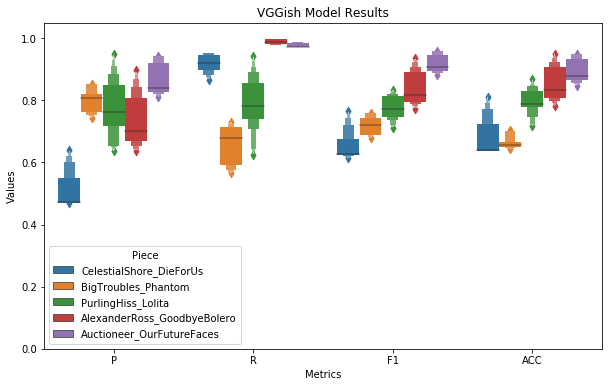

In [20]:
plt.figure(figsize=(10,6))
plt.title('VGGish Model Results')
g = sns.boxenplot(data=df_melt,x='metric',y='value',order=['P','R','F1','ACC'],hue='piece')
g.set(ylim=(0.0,1.05))
g.set(xlabel='Metrics', ylabel='Values')
plt.legend(title='Piece')
plt.show()

In [26]:
sf.which_sources(pieces_chosen[4],0,300)

{'auxiliary percussion',
 'banjo',
 'clean electric guitar',
 'drum set',
 'electric bass',
 'horn section',
 'male singer',
 'piano',
 'vibraphone',
 'vocalists'}

In [116]:
results_rf[results_rf.piece == pieces_chosen[0]]

split                    piece                           type  opt_tshld  \
5        0  CelestialShore_DieForUs                         output        0.6   
6        0  CelestialShore_DieForUs                fixed threshold        0.6   
7        0  CelestialShore_DieForUs       fixed threshold smoothed        0.6   
8        0  CelestialShore_DieForUs           optimal binarization        0.6   
9        0  CelestialShore_DieForUs  optimal binarization smoothed        0.6   
190      2  CelestialShore_DieForUs                         output        0.6   
191      2  CelestialShore_DieForUs                fixed threshold        0.6   
192      2  CelestialShore_DieForUs       fixed threshold smoothed        0.6   
193      2  CelestialShore_DieForUs           optimal binarization        0.6   
194      2  CelestialShore_DieForUs  optimal binarization smoothed        0.6   

          ACC         P         R        F1  
5    0.631579  0.463415  0.883721  0.608000  
6    0.503759  0.390995  0.959302  0.555556  
7    0.402256  0.349174  0.982558  0.515244  
8    0.691729  0.512987  0.918605  0.658333  
9    0.622180  0.460055  0.970930  0.624299  
190  0.648496  0.477745  0.936047  0.632613  
191  0.531955  0.405868  0.965116  0.571429  
192  0.451128  0.370690  1.000000  0.540881  
193  0.669173  0.493939  0.947674  0.649402  
194  0.635338  0.469780  0.994186  0.638060

In [155]:
# Usar o melhor resultado de F1 para mostrar o gráfico de classificação dos trechos cantados
piece_name = pieces_chosen[0]
piece_features, piece_labels = sf.read_vggish_features([piece_name], verbose=False)
pred_labels = rf_models[2].predict(piece_features)

In [156]:
proba = rf_models[2].predict_proba(piece_features)[:,1]

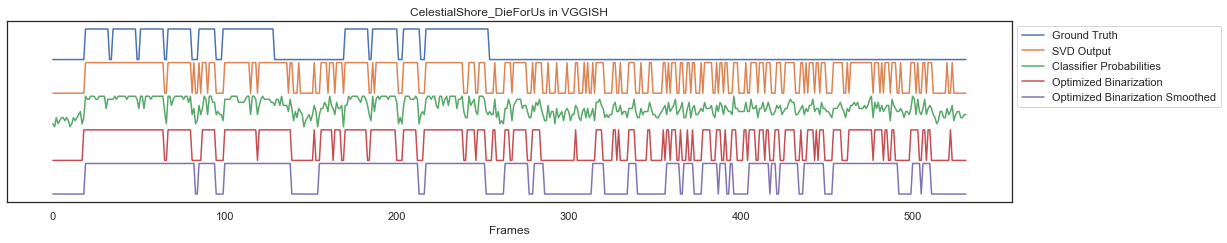

In [157]:
sns.set_style(style='white')
plt.figure(figsize=(18,3.34))
plt.title(piece_name+ ' in VGGISH')
plt.plot(piece_labels+2.2)
plt.plot(pred_labels+1.1)
plt.plot(proba)
thresh = np.where(even_median_filter(proba,kernel=2) >= opt_tshld,1,0)
plt.plot(thresh-1.1)
thresh = np.where(scipy.signal.medfilt(proba,kernel_size=7) >= opt_tshld,1,0)
plt.plot(thresh-2.2)
plt.yticks([])
plt.xlabel('Frames')
plt.legend(['Ground Truth','SVD Output','Classifier Probabilities', 'Optimized Binarization',   'Optimized Binarization Smoothed'], bbox_to_anchor=(1, 1))

In [ ]:
0 -2
3 -3
4 -5

In [113]:
results_rf[(results_rf['piece']==pieces_chosen[3])&(results_rf['split']==3)]

split                        piece                  type  opt_tshld  \
105      3  AlexanderRoss_GoodbyeBolero  optimal binarization        0.6   
104      3  AlexanderRoss_GoodbyeBolero                output        0.6   

          ACC         P         R        F1  
105  0.807018  0.665169  0.983389  0.793566  
104  0.807018  0.665169  0.983389  0.793566

In [114]:
results_rf[results_rf['piece'].isin(pieces_chosen)]

split                        piece                  type  opt_tshld  \
2        0      CelestialShore_DieForUs                output        0.6   
3        0      CelestialShore_DieForUs  optimal binarization        0.6   
347      9          BigTroubles_Phantom  optimal binarization        0.6   
346      9          BigTroubles_Phantom                output        0.6   
76       2      CelestialShore_DieForUs                output        0.6   
77       2      CelestialShore_DieForUs  optimal binarization        0.6   
184      5          BigTroubles_Phantom                output        0.6   
185      5          BigTroubles_Phantom  optimal binarization        0.6   
153      4          BigTroubles_Phantom  optimal binarization        0.6   
152      4          BigTroubles_Phantom                output        0.6   
25       0           PurlingHiss_Lolita  optimal binarization        0.6   
24       0           PurlingHiss_Lolita                output        0.6   
62       1           PurlingHiss_Lolita                output        0.6   
63       1           PurlingHiss_Lolita  optimal binarization        0.6   
303      8  AlexanderRoss_GoodbyeBolero  optimal binarization        0.6   
302      8  AlexanderRoss_GoodbyeBolero                output        0.6   
379      9           PurlingHiss_Lolita  optimal binarization        0.6   
378      9           PurlingHiss_Lolita                output        0.6   
176      4           PurlingHiss_Lolita                output        0.6   
177      4           PurlingHiss_Lolita  optimal binarization        0.6   
335      8           PurlingHiss_Lolita  optimal binarization        0.6   
334      8           PurlingHiss_Lolita                output        0.6   
105      3  AlexanderRoss_GoodbyeBolero  optimal binarization        0.6   
104      3  AlexanderRoss_GoodbyeBolero                output        0.6   
71       2  AlexanderRoss_GoodbyeBolero  optimal binarization        0.6   
70       2  AlexanderRoss_GoodbyeBolero                output        0.6   
181      5    Auctioneer_OurFutureFaces  optimal binarization        0.6   
180      5    Auctioneer_OurFutureFaces                output        0.6   
268      7    Auctioneer_OurFutureFaces                output        0.6   
269      7    Auctioneer_OurFutureFaces  optimal binarization        0.6   

          ACC         P         R        F1  
2    0.640977  0.470588  0.883721  0.614141  
3    0.640977  0.470588  0.883721  0.614141  
347  0.645051  0.763314  0.668394  0.712707  
346  0.645051  0.763314  0.668394  0.712707  
76   0.652256  0.480480  0.930233  0.633663  
77   0.652256  0.480480  0.930233  0.633663  
184  0.662116  0.786585  0.668394  0.722689  
185  0.662116  0.786585  0.668394  0.722689  
153  0.665529  0.762431  0.715026  0.737968  
152  0.665529  0.762431  0.715026  0.737968  
25   0.711207  0.624573  0.884058  0.732000  
24   0.711207  0.624573  0.884058  0.732000  
62   0.721983  0.668103  0.748792  0.706150  
63   0.721983  0.668103  0.748792  0.706150  
303  0.740602  0.595918  0.970100  0.738306  
302  0.740602  0.595918  0.970100  0.738306  
379  0.741379  0.714286  0.700483  0.707317  
378  0.741379  0.714286  0.700483  0.707317  
176  0.778017  0.713115  0.840580  0.771619  
177  0.778017  0.713115  0.840580  0.771619  
335  0.778017  0.757426  0.739130  0.748166  
334  0.778017  0.757426  0.739130  0.748166  
105  0.807018  0.665169  0.983389  0.793566  
104  0.807018  0.665169  0.983389  0.793566  
71   0.818296  0.680556  0.976744  0.802183  
70   0.818296  0.680556  0.976744  0.802183  
181  0.826733  0.795848  0.954357  0.867925  
180  0.826733  0.795848  0.954357  0.867925  
268  0.853960  0.818182  0.970954  0.888046  
269  0.853960  0.818182  0.970954  0.888046

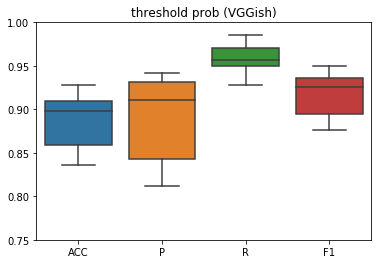

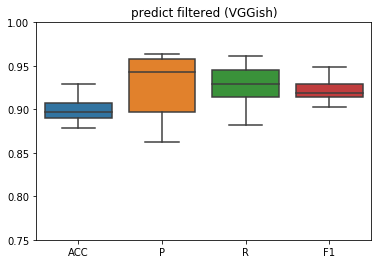

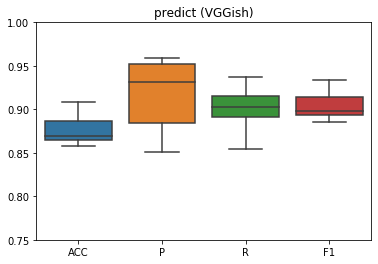

In [21]:
for tp in results_rf['type'].unique():
    plt.title(tp+' (VGGish)')
    g = sns.boxplot(data=results_rf[results_rf['type'] == tp][['ACC','P','R','F1','split']].groupby(['split']).mean())
    g.set(ylim=(0.75,1))
    plt.show()

Text(0.5, 0, 'Relative Importance')

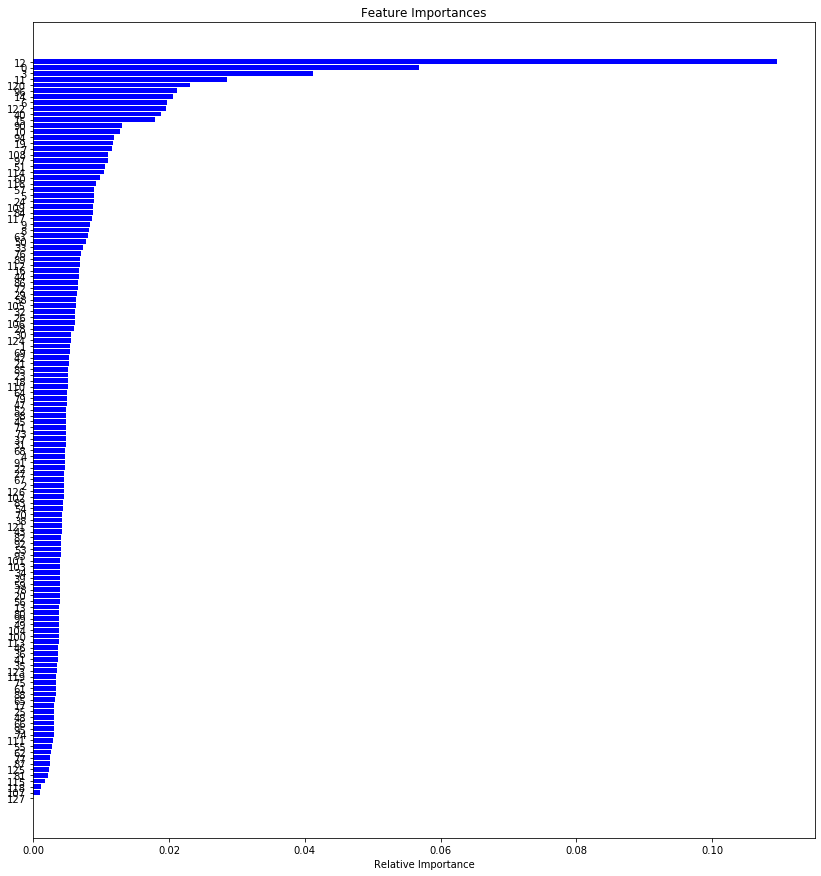

In [17]:
plt.figure(figsize=(14,15))

features = np.arange(128)
importances = clf3.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

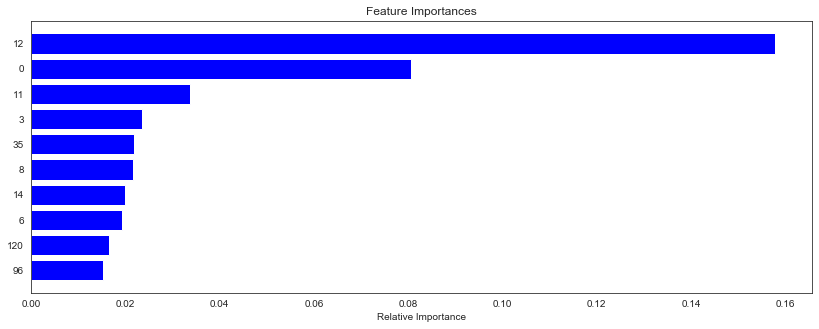

In [40]:
plt.figure(figsize=(14,5))
features = np.arange(128)
importances = clf3.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices))[118:], importances[indices][118:], color='b', align='center')
plt.yticks(range(len(indices))[118:], features[indices][118:])
plt.xlabel('Relative Importance')

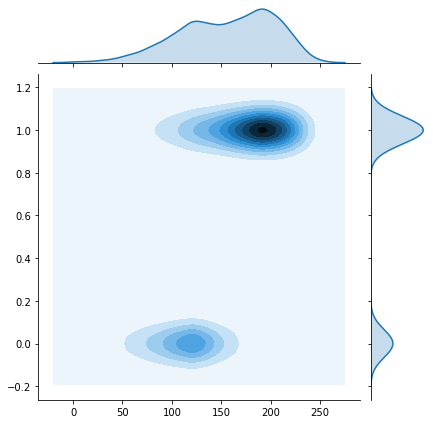

In [16]:
X, y = sf.read_vggish_features(train_files[spl]+test_files[spl], verbose=False)
sns.jointplot(X[:,12],y,kind="kde")

In [15]:
sns.jointplot(X_train[:,12],y_train,kind="kde")

NameError: name 'X_test' is not defined

In [9]:
from sklearn.mixture import GaussianMixture

mixture = GaussianMixture(n_components=2).fit(X_train[:,12].reshape(-1, 1))
means_hat = mixture.means_.flatten()
weights_hat = mixture.weights_.flatten()
sds_hat = np.sqrt(mixture.covariances_).flatten()

print(mixture.converged_)
print(means_hat)
print(sds_hat)
print(weights_hat)

True
[116.94123031 197.41368998]
[36.28912144 23.68170917]
[0.51769245 0.48230755]


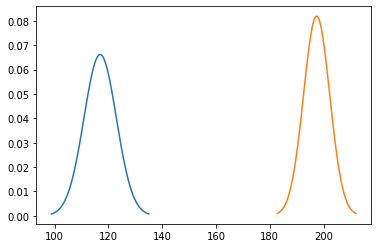

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = means_hat[0]
variance = sds_hat[0]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
mu = means_hat[1]
variance = sds_hat[1]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

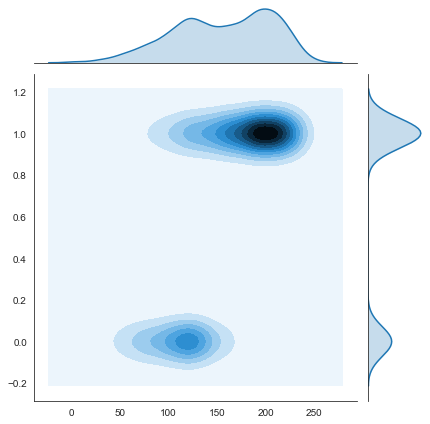

In [155]:
sns.jointplot(X_train[:,12],y_train,kind="kde")

In [158]:
df_dist.head()

label  VGGish12
0      1       195
1      1       199
2      1       149
3      1       198
4      0       136

In [16]:
df_dist = pd.DataFrame(X_train)
df_dist['label'] = y_train

In [33]:
df_dist.head()

0   1    2    3    4   5    6    7   8    9  ...  119  120  121  122  \
0  187  18  131  114  230  76   97  118  44  190  ...  138  217  255   17   
1  191  18  135  108  232  81   97  134  37  180  ...   97  255  255    0   
2  185  27  147  115  225  43  104  105  55  137  ...   73  255  230  204   
3  187  20  137  105  225  63  117  126  36  182  ...   23  255  237  229   
4  182  16  144   95  222  89  102  132  68  221  ...    0  241  255   62   

   123  124  125  126  127  label  
0    8  255    0    0  255      1  
1  108  255    0    6  255      1  
2  169  255   64    0  255      1  
3  140  255  125   56  255      1  
4   99  255    0    0  255      0  

[5 rows x 129 columns]

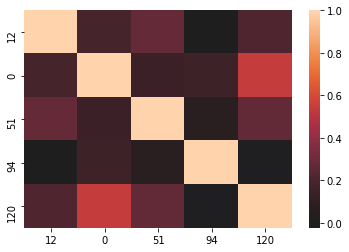

In [61]:
sns.heatmap(data=df_dist.loc[df_dist.label==0][[12, 0, 51, 94, 120]].corr(), center=0)

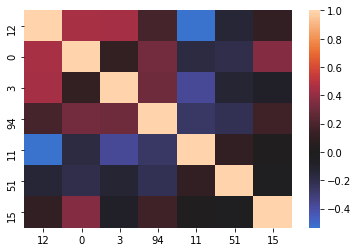

In [37]:
sns.heatmap(data=df_dist.loc[df_dist.label==1][[12, 0, 3, 94, 11, 51, 15]].corr(), center = 0)

In [ ]:
sns.distplot(df_dist.loc[df_dist.label==0][coef],df_dist.loc[df_dist.label==1][coef])

Text(3.8, 4.5, 'presente')

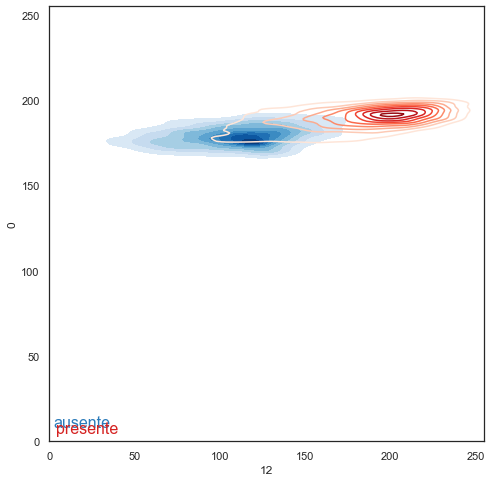

In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.set(style="darkgrid")
# iris = sns.load_dataset("iris")

# # Subset the iris dataset by species
# setosa = iris.query("species == 'setosa'")
# virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(df_dist.loc[df_dist.label==0][12], df_dist.loc[df_dist.label==0][0],
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(df_dist.loc[df_dist.label==1][12], df_dist.loc[df_dist.label==1][0],
                 cmap="Reds", shade=False, shade_lowest=False)
ax.set(ylim=(0, 255))
ax.set(xlim=(0, 255))
# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "ausente", size=16, color=blue)
ax.text(3.8, 4.5, "presente", size=16, color=red)

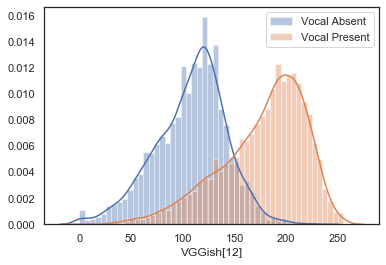

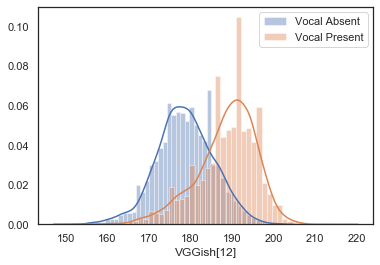

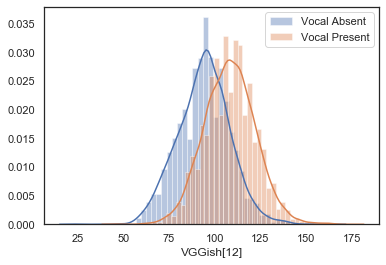

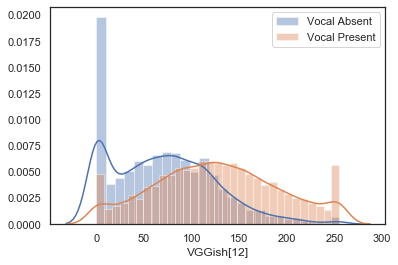

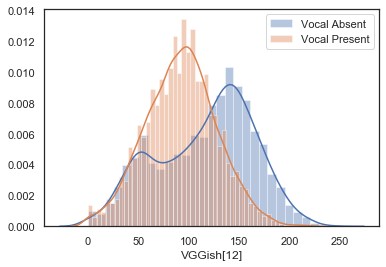

In [18]:
for coef in [12,0,3,94, 11]:
    sns.set_style('white')
    sns.distplot(df_dist.loc[df_dist.label==0][coef])
    sns.distplot(df_dist.loc[df_dist.label==1][coef])
    plt.legend(['Vocal Absent ', 'Vocal Present'])
    plt.xlabel('VGGish[12]')
    plt.show()

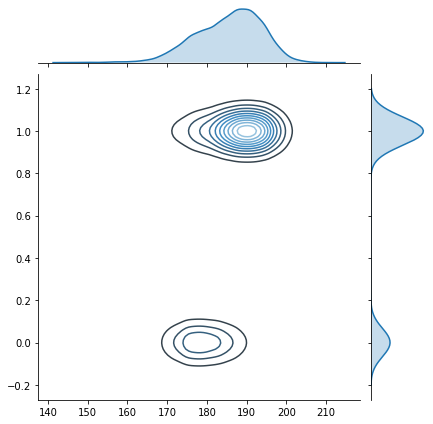

In [15]:
## VISUALIZE TREES FROM RANDOM FOREST

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf3.estimators_[0], out_file='tree.dot', 
                feature_names = features,
                class_names = labels,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [16]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [10]:
import shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


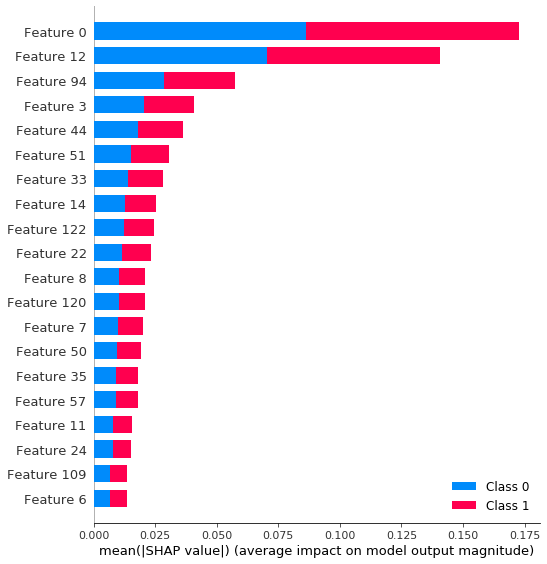

In [11]:
shap_values = shap.TreeExplainer(clf3).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

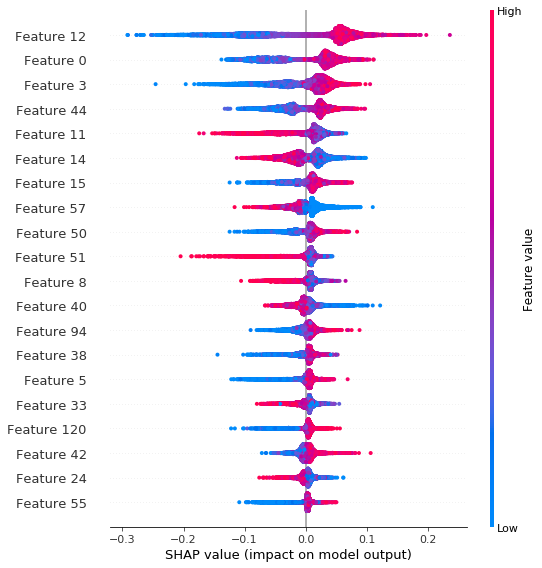

In [38]:
shap.summary_plot(shap_values[1], X_train)

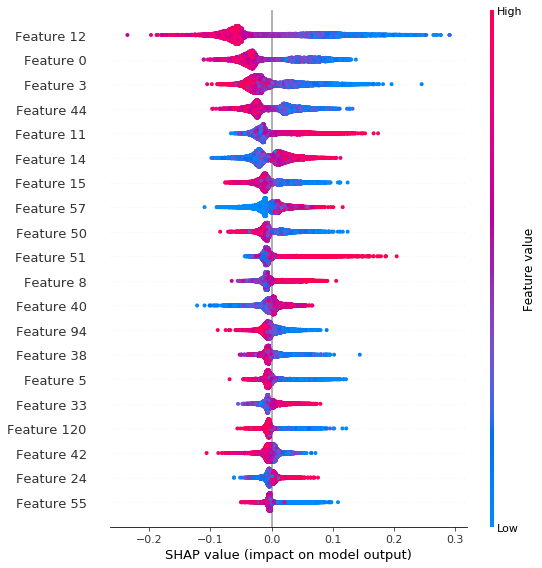

In [39]:
shap.summary_plot(shap_values[0], X_train)

In [16]:
df_X = pd.DataFrame(X_train)

In [17]:
df_X.columns = ['f'+str(x) for x in df_X.columns]
df_X.head()

f0  f1   f2   f3   f4  f5   f6   f7  f8   f9  ...  f118  f119  f120  f121  \
0  187  18  131  114  230  76   97  118  44  190  ...    36   138   217   255   
1  191  18  135  108  232  81   97  134  37  180  ...    75    97   255   255   
2  185  27  147  115  225  43  104  105  55  137  ...     0    73   255   230   
3  187  20  137  105  225  63  117  126  36  182  ...     0    23   255   237   
4  182  16  144   95  222  89  102  132  68  221  ...     0     0   241   255   

   f122  f123  f124  f125  f126  f127  
0    17     8   255     0     0   255  
1     0   108   255     0     6   255  
2   204   169   255    64     0   255  
3   229   140   255   125    56   255  
4    62    99   255     0     0   255  

[5 rows x 128 columns]

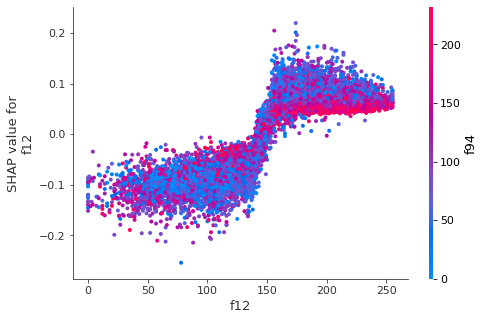

In [20]:
shap.dependence_plot('f12', shap_values[1], df_X)

In [14]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(clf3)
    shap_values_Model = explainerModel.shap_values(S)[1]
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [13]:
# Get the predictions and put them with the test data.
X_output = pd.DataFrame(X_test).copy()
X_output.loc[:,'predict'] = np.round(clf3.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

0   1    2    3    4   5    6    7   8    9  ...  119  120  121  122  \
1    180  21  138  106  237  69   90  116  67  204  ...   71  203  255   66   
51   192  30  156  104  233  85  103  114  31  176  ...   50  255  255  165   
101  192  32  175   91  218  83   75   90   4  217  ...  125  255  255  100   
151  183  31  133  105  255  60   91  112  18  179  ...  194  238  255  154   
201  192  20  163   93  214  80   99  138  48  254  ...  146  255  255   46   
251  189  30  160   97  222  68   68  107  33  235  ...  179  211  255  112   
301  179   9  146  140  202  86   95  119  97  182  ...  151  108  173   72   

     123  124  125  126  127  predict  
1    129  179   71  176  255        0  
51   197  255   67   98  255        1  
101  178  255   71  227  255        0  
151   55  237  120  190  255        1  
201   75  218    0   42  255        0  
251   99  255  138  255  255        1  
301  152  255    0   17  255        1  

[7 rows x 129 columns]

In [62]:
shap_plot(0)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

# Testing in one piece

In [8]:
piece_name = 'SweetLights_YouLetMeDown'

In [9]:
#vggish = pd.read_csv(VGGish_PATH+piece_name+"_VGGish_PCA.csv",index_col=None, header=None)
#vggish = vggish.values
mfcc_piece = mfcc_path+piece_name+'_MIX.arff'
dataset = arff.loadarff(mfcc_piece)
data = pd.DataFrame(dataset[0]).values
#data = np.array(dataset['data'])

In [10]:
piece_features = data

In [11]:
piece_test = np.load(FEAT_PATH+piece_name+"_labels_20ms.npy")
print (piece_test.shape, piece_features.shape)
#piece_test = piece_test[:piece_features.shape[0]]

(19599,) (19599, 60)


In [12]:
piece_features, piece_labels = sf.read_vggish_features([piece_name])

.
> Load data completed!
Percentage of discarded frames 0.05


In [13]:
#pred_labels = rf.predict(piece_features)
pred_labels = clf3.predict(piece_features)

In [14]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(piece_labels, pred_labels)
print(accuracy)

0.9974160206718347


In [15]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(piece_labels, pred_labels)
plot_cm(cm)

NameError: name 'plot_cm' is not defined

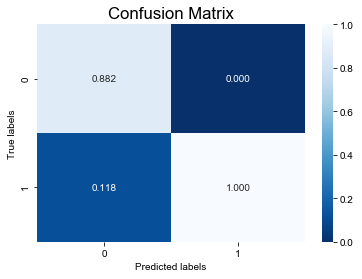

In [16]:
ax= plt.subplot()
ax = sns.heatmap(cm/sum(cm), annot=True, ax = ax, fmt='.3f',vmin=0, vmax=1, cmap="Blues_r"); #annot=True to annotate cells

sns.set(font_scale=1.4)
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
# cbar = cd.figure.colorbar(cd.collections[0])
# cbar.set_ticks([])
# cbar.set_ticklabels(["0%", "100%"])
# plt.show()


In [17]:
# import scipy.signal
# import matplotlib.pyplot as plt
# %matplotlib inline

# import seaborn as sns

In [20]:
proba = clf3.predict_proba(piece_features)
proba = proba[:,1]

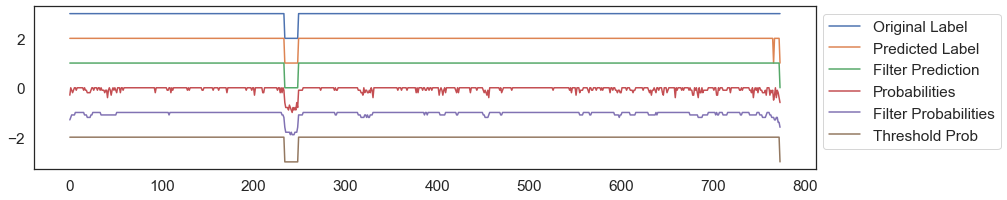

In [21]:
sns.set_style(style='white')
plt.figure(figsize=(14,3))
plt.plot(piece_labels+2)
plt.plot(pred_labels+1)
plt.plot(scipy.signal.medfilt(pred_labels,kernel_size=5))
plt.plot(proba-1)
plt.plot(scipy.signal.medfilt(proba,kernel_size=5)-2)
thresh = np.zeros(len(proba))
thresh[scipy.signal.medfilt(proba,kernel_size=11) >= 0.6] = 1
plt.plot(thresh-3)

plt.xlabel('Frames')
plt.legend(['Original Label', 'Predicted Label', 'Filter Prediction', 
            'Probabilities', 'Filter Probabilities', 'Threshold Prob'], bbox_to_anchor=(1, 1))

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [142]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1, solver='lbfgs')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [143]:
#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#y = np.array([1, 1, 1, 2, 2, 2])
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]


In [145]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf1.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf1.predict(X_test), y_test)
print(accuracy)

0.949726609963548
0.8610721302273365


In [146]:
np.array_equal(eclf1.named_estimators_.lr.predict(X),
               eclf1.named_estimators_['lr'].predict(X))

eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X, y)
print(eclf2.predict(X))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]


In [148]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf2.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf2.predict(X_test), y_test)
print(accuracy)

0.9367658971243419
0.8599494807746281


In [149]:
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1],
       flatten_transform=True)
eclf3 = eclf3.fit(X, y)
print(eclf3.predict(X))

print(eclf3.transform(X).shape)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[1 1 1 ... 0 0 0]
(19752, 6)


In [150]:
# RF VGGish Accuracy
accuracy = sklearn.metrics.accuracy_score(eclf3.predict(X), y)
print(accuracy)
accuracy = sklearn.metrics.accuracy_score(eclf3.predict(X_test), y_test)
print(accuracy)

0.9405123531794248
0.8633174291327533


## Size of intervals on label data

In [40]:
print ('Porcentagens de frames')
print ('Menores que 200ms, menores que 960ms, maiores que 960ms')
print (np.array(perc[0])/sum(np.array(perc[0])))
print (np.array(perc[1])/sum(np.array(perc[1])))


Porcentagens de frames
Menores que 200ms, menores que 960ms, maiores que 960ms
[0.04044118 0.34375    0.61580882]
[0.00917431 0.04954128 0.9412844 ]


In [56]:
def count_spaces(piece_labels_all, perc):
    tamanhos = [[],[]]
    x = piece_labels_all
    cont_0 = 0
    cont_1 = 0
    min_0 = 20*len(x)
    min_1 = 20*len(x)

    for i in range(1,len(piece_labels_all)):

        if x[i] == x[i-1]:
            if x[i] == 0:
                cont_0 += 1
            else:
                cont_1 += 1
        else:
            if x[i] == 0:
                if cont_1 > 0 and cont_1 < min_1:
                    min_1 = cont_1
                
                if cont_1 < 10:
                    perc[1][0] += 1
                elif cont_1 < 48:
                    perc[1][1] += 1
                else:
                    perc[1][2] += 1
                tamanhos[1].append(cont_1)   
                cont_1 = 0
                
            else:
                if cont_0 > 0 and cont_0 < min_0:
                    min_0 = cont_0
                
                if cont_0 < 10:
                    perc[0][0] += 1
                elif cont_0 < 48:
                    perc[0][1] += 1
                else:
                    perc[0][2] += 1
                tamanhos[0].append(cont_0)    
                cont_0 = 0
   

    #print ('Min 0: ',min_0,'\nMin 1:', min_1)
    return tamanhos

In [57]:

perc = [[0,0,0],[0,0,0]]
piece_features_all, piece_labels_all = sf.read_all_features(train_files[0]+test_files[0])
tams = count_spaces(piece_labels_all, perc)
#print (piece_name)

print ('Porcentagens de frames - SPLIT', 0)
print ('Menores que 200ms, menores que 960ms, maiores que 960ms')
print (np.array(perc[0])/sum(np.array(perc[0])))
print (np.array(perc[1])/sum(np.array(perc[1])))
print ('Porcentagem geral')
print (np.array(perc[0])/sum(np.array(perc[0])+np.array(perc[1])))
print (np.array(perc[1])/sum(np.array(perc[0])+np.array(perc[1])))

.............................................................
> Load data completed!
Porcentagens de frames - SPLIT 0
Menores que 200ms, menores que 960ms, maiores que 960ms
[0.03290676 0.33272395 0.63436929]
[0.00914077 0.04936015 0.94149909]
Porcentagem geral
[0.01645338 0.16636197 0.31718464]
[0.00457038 0.02468007 0.47074954]


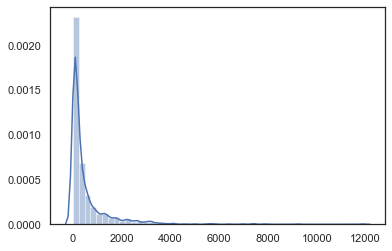

In [58]:
sns.distplot(tams)

In [51]:
193*20

In [63]:
tams.T

AttributeError: 'list' object has no attribute 'T'

In [59]:
df = pd.DataFrame(tams)

In [66]:
df = df/20 *1000

In [67]:
df.describe()

0           1
count  547.000000  547.000000
mean     6.904717   15.275686
std     16.031858   22.703405
min      0.040000    0.000000
25%      0.660000    3.440000
50%      1.480000    7.380000
75%      4.430000   17.530000
max    148.740000  237.820000

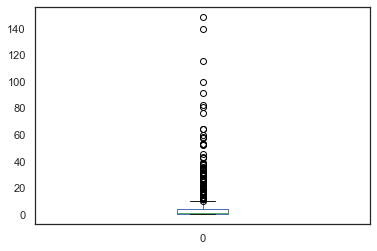

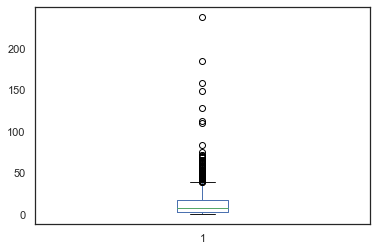

In [126]:
df[0].plot.box()
plt.show()
df[1].plot.box()

In [48]:
for spl in range(10):
    perc = [[0,0,0],[0,0,0]]
    piece_features_all, piece_labels_all = sf.read_all_features(train_files[spl])
    m0, m1 = count_spaces(piece_labels_all, perc)
    #print (piece_name)

    print ('Porcentagens de frames - SPLIT', spl)
    print ('Menores que 200ms, menores que 960ms, maiores que 960ms')
    print (np.array(perc[0])/sum(np.array(perc[0])))
    print (np.array(perc[1])/sum(np.array(perc[1])))
    print ('Porcentagem geral')
    print (np.array(perc[0])/sum(np.array(perc[0])+np.array(perc[1])))
    print (np.array(perc[1])/sum(np.array(perc[0])+np.array(perc[1])))

...........................................
> Load data completed!
Porcentagens de frames - SPLIT 0
Menores que 200ms, menores que 960ms, maiores que 960ms
[0.03562341 0.34605598 0.61832061]
[0.01272265 0.06361323 0.92366412]
Porcentagem geral
[0.0178117  0.17302799 0.30916031]
[0.00636132 0.03180662 0.46183206]
............................................
> Load data completed!
Porcentagens de frames - SPLIT 1
Menores que 200ms, menores que 960ms, maiores que 960ms
[0.02786378 0.33436533 0.6377709 ]
[0.00928793 0.0495356  0.94117647]
Porcentagem geral
[0.01393189 0.16718266 0.31888545]
[0.00464396 0.0247678  0.47058824]
............................................
> Load data completed!
Porcentagens de frames - SPLIT 2
Menores que 200ms, menores que 960ms, maiores que 960ms
[0.02631579 0.33421053 0.63947368]
[0.00789474 0.06578947 0.92631579]
Porcentagem geral
[0.01315789 0.16710526 0.31973684]
[0.00394737 0.03289474 0.46315789]
......................................
> Load data compl

In [47]:
print (np.array(perc[0])/sum(np.array(perc[0])+np.array(perc[1])))
print (np.array(perc[1])/sum(np.array(perc[0])+np.array(perc[1])))

[0.01879699 0.16666667 0.31453634]
[0.00501253 0.03132832 0.46365915]


In [ ]:
1.7% de frames trechos menores que 200ms, logo, consideramos todos os trechos como não vozeados

In [158]:
results_rf

split              piece      genre                           type  \
0        0  AvaLuna_Waterduct       Rock                         output   
1        0  AvaLuna_Waterduct       Rock                fixed threshold   
2        0  AvaLuna_Waterduct       Rock       fixed threshold smoothed   
3        0  AvaLuna_Waterduct       Rock           optimal binarization   
4        0  AvaLuna_Waterduct       Rock  optimal binarization smoothed   
..     ...                ...        ...                            ...   
965      9   Wolf_DieBekherte  Classical                         output   
966      9   Wolf_DieBekherte  Classical                fixed threshold   
967      9   Wolf_DieBekherte  Classical       fixed threshold smoothed   
968      9   Wolf_DieBekherte  Classical           optimal binarization   
969      9   Wolf_DieBekherte  Classical  optimal binarization smoothed   

     opt_tshld       ACC         P         R        F1  
0          0.6  0.889157  0.834061  0.959799  0.892523  
1          0.6  0.814458  0.724265  0.989950  0.836518  
2          0.6  0.778313  0.687719  0.984925  0.809917  
3          0.6  0.886747  0.848624  0.929648  0.887290  
4          0.6  0.903614  0.873239  0.934673  0.902913  
..         ...       ...       ...       ...       ...  
965        0.6  0.966759  0.985612  0.971631  0.978571  
966        0.6  0.966759  0.968750  0.989362  0.978947  
967        0.6  0.988920  0.986014  1.000000  0.992958  
968        0.6  0.963989  0.985560  0.968085  0.976744  
969        0.6  0.986150  0.985965  0.996454  0.991182  

[970 rows x 9 columns]

In [159]:
results_rf.to_hdf('../data/output/results_VGGish.h5','df')